## 奇异值分解
奇异值分解(Singular Value Decomposition)是一种非常强大的工具，它在特征提取、降维和噪声过滤等方面发挥着重要作用。

### 奇异值分解的定义
将一个任意的矩阵分解为三个特殊矩阵的乘积。一个 $ m \times n $ 矩阵 $ A $ 可以被分解为：
$$ A = U \Sigma V^T $$
- $ U $ 是一个 $ m \times m $ 的正交矩阵，其列向量称为左奇异向量。
- $ \Sigma $ 是一个 $ m \times n $ 的对角矩阵，其中对角线上的元素（称为奇异值）是非负的，并且按降序排列。
- $ V^T $ 是 $ n \times n $ 的正交矩阵，$ V $的列向量称为右奇异向量。

### 奇异值的意义
在这个分解中，奇异值 $ \sigma_i $（$ \Sigma $ 矩阵的对角线元素）表示了原始数据在某一个特定方向上的“重要性”或“信息量”。奇异值越大，代表该方向上的信息越重要。因此，通过选择前 
$ k $ 个最大的奇异值和对应的奇异向量，我们可以进行数据的降维处理。

### 奇异值分解的几何意义
从几何的角度理解，奇异值分解可以被视为将数据从原始空间转换到一个新的空间。在 $ U $ 的列空间中，每个数据点（即矩阵 $ A $ 的行）被投影到一个新的“特征空间”中，保留了数据的重要结构信息。矩阵 $ A $ 的奇异值则量化了这些特征的“重要性”。


### 奇异值计算
奇异值是矩阵 $ A $ 在某种意义上的“特征”，它们反映了 $ A $ 的结构特征和信息。从 $ \Sigma $ 中提取奇异值，方法如下：
1. 计算 $ A^TA $。  
给定一个矩阵 $ A $，首先计算其转置矩阵 $ A^T $，然后计算 $ A^TA $ 乘积。这个结果是一个 $ n \times n $ 的矩阵。
2. 获取这两个矩阵的特征值。  
要计算$ A^TA $的特征值 $ \lambda_i $。如果 $ A $ 是一个 $ m \times n $ 的矩阵，$ A^T A $ 将是一个 $ n \times n $ 的矩阵，可以使用求解特征多项式的方法来找出特征值。
3. 将特征值开平方得到奇异值。  
奇异值 $ s_i $ 是特征值的非负平方根：$ s_i = \sqrt{\lambda_i} $ 对所有的特征值 $ \lambda_i $ 执行这一操作，得到的就是所有的奇异值。

### 例子
$$ A = \begin{pmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{pmatrix} $$

1. 计算 $ A^TA $ ：
$$ A^T = \begin{pmatrix} 1 & 3 & 5 \\ 2 & 4 & 6 \end{pmatrix} 
   \implies A^T A = \begin{pmatrix} 1 & 3 & 5 \\ 2 & 4 & 6 \end{pmatrix} 
                    \begin{pmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6\end{pmatrix} 
                  = \begin{pmatrix} 35 & 44 \\ 44 & 56\end{pmatrix} $$  


    

2. 求特征值：特征值 $ \lambda $ 需要解这个方程：
$$ \text{det}(A^T A - \lambda I) = 0 
   \implies \text{det}(\begin{pmatrix} 35 & 44 \\ 44 & 56\end{pmatrix} 
                       - \lambda \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} ) = 0 $$
 $$  \implies \text{det}(\begin{pmatrix} 35 & 44 \\ 44 & 56\end{pmatrix} 
                       - \begin{pmatrix} \lambda & 0 \\ 0 & \lambda \end{pmatrix} ) = 0 
     \implies \text{det}(\begin{pmatrix} 35 - \lambda & 44 \\ 44 & 56 - \lambda \end{pmatrix} ) = 0 $$
 $$  \implies (35 - \lambda)(56 - \lambda) - 44 \times 44 = 0 
     \implies 35 \times 56 - 35\lambda - 56\lambda + \lambda^2 - 1936 = 0 $$
 $$  \implies 1960 - 91\lambda + \lambda^2 - 1936 = 0 
     \implies \lambda^2 - 91\lambda + 24 = 0 $$ 

     解这个二次方程：
 $$ \lambda = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$ 
 $$ \implies \lambda = \frac{91 \pm \sqrt{91^2 - 4 \cdot 1 \cdot 24}}{2 \cdot 1} = \frac{91 \pm \sqrt{8281 - 96}}{2} 
    = \frac{91 \pm \sqrt{8185}}{2} $$ 
 $$  \implies \frac{91 \pm 90.47}{2} \implies \lambda_1 \approx 90.735, \quad \lambda_2 \approx 0.265 $$  

3. 计算奇异值：
  奇异值是 $ \lambda_1 $ 和 $ \lambda_2 $ 的平方根：
  $$ \sigma_1 \approx \sqrt{90.735} \approx 9.526 \quad \sigma_2 \approx \sqrt{0.265} \approx 0.515


In [2]:
import numpy as np

# 定义矩阵A
A = np.array([[1, 2], [3, 4], [5, 6]])

# 计算SVD
U, s, VT = np.linalg.svd(A)

# 输出奇异值
print("奇异值:")
print(s)

奇异值:
[9.52551809 0.51430058]


### 应用案例

#### 案例：图像压缩
1. 计算奇异值分解：$ A = U \Sigma V^T $。
2. 选择前 $ k $ 个奇异值及其对应的奇异向量来重构图像：$ A_k = U_k \Sigma_k V_k^T $ 

$ U_k $、$ \Sigma_k $ 和 $ V_k $ 分别是矩阵 $ U $、$ \Sigma $ 和 $ V $ 的前 $ k $ 列。

仅用 $ k $ 个奇异值来近似重构原始图像，这样就达到了压缩的目的，同时尽量保留重要的图像信息。此方法特别有效，能够显著减少存储空间并保持图像的可读性。

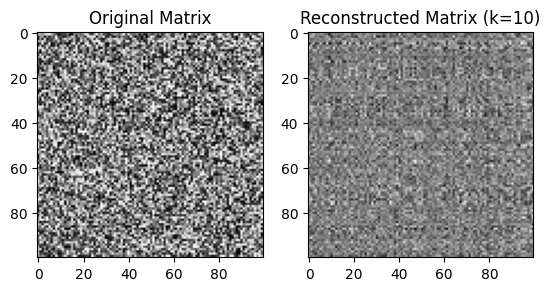

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一个简单的随机矩阵（这里我们可以想象成一幅图像）
A = np.random.rand(100, 100)

# 进行奇异值分解
U, S, VT = np.linalg.svd(A)

# 选择前 k 个奇异值
k = 10
A_k = np.dot(U[:, :k], np.dot(np.diag(S[:k]), VT[:k, :]))

# 可视化结果
plt.subplot(1, 2, 1)
plt.title('Original Matrix')
plt.imshow(A, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Matrix (k=10)')
plt.imshow(A_k, cmap='gray')

plt.show()

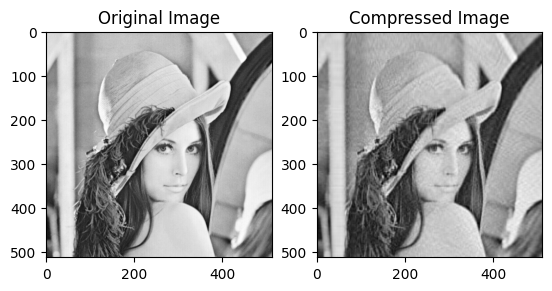

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = plt.imread('Lena Forsén.png')  # 假设图像是灰度图像
# 将图像转换为矩阵
A = image[:, :, 0]  

# 执行奇异值分解
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# 保留前k个奇异值
k = 50
A_k = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))

# 显示原始图像和压缩后的图像
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(A, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Compressed Image')
plt.imshow(A_k, cmap='gray')
plt.show()

#### 案例：推荐系统
1. 协同过滤
将用户对商品的评分表示为一个矩阵 $ R $ 。通过对 $ R $ 进行 SVD 分解，得到以下形式：
$$ R \approx U \Sigma V^T $$
$ U $ 包含了用户的潜在特征，而 $ V $ 包含了产品的潜在特征。我们可以通过重构 $ R $ 的低秩近似，来预测未评分产品的评分。

In [4]:
import numpy as np

# 用户-产品评分矩阵（示例）
R = np.array([[5, 4, 0, 1],
              [4, 0, 0, 1],
              [1, 1, 0, 5],
              [1, 0, 5, 4]])

# 执行奇异值分解
U, S, Vt = np.linalg.svd(R, full_matrices=False)

# 重构评分矩阵
k = 2  # 选择潜在特征的数量
R_approx = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))

# 输出重构后的评分矩阵
print("Reconstructed Rating Matrix:")
print(R_approx)

Reconstructed Rating Matrix:
[[ 5.36552676e+00  3.12436432e+00 -5.39180731e-01  1.35664777e+00]
 [ 2.97514135e+00  1.70259531e+00  1.11962525e-03  1.13266683e+00]
 [ 1.75329945e+00  7.94689924e-01  2.09929146e+00  3.32787299e+00]
 [ 6.30752574e-01 -1.14862923e-02  3.74589656e+00  4.98839649e+00]]


#### 案例：噪声过滤与信号处理

在信号处理领域，奇异值分解被广泛应用于噪声过滤与信号提取。通过对信号矩阵进行 SVD 分解，我们可以容易地区分信号部分和噪声部分，从而降低噪声的影响，提高信号的质量。

**噪声去除**  
假设我们有一组时间序列数据，其中混入了噪声。可以构建一个矩阵，其中每行是不同时间点的观测。通过对其进行 SVD，保留前几个奇异值，重构信号矩阵，便可获得去噪后的结果。